In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from PIL import Image
from skimage.measure import regionprops, label, find_contours
from scipy.spatial.distance import cdist

In [2]:
#値を-1から1に正規化する関数
def normalize_x(image):
    return image / 127.5 - 1


def denormalize_x(image):
    return (image + 1) * 127.5


#値を0から1正規化する関数
def normalize_y(image):
    return image / 255


#値を0から255に戻す関数
def denormalize_y(image):
    return image * 255

In [3]:
# インプット画像を読み込む関数
def load_X_gray(folder_path):
    
    image_files = []

    #image_files = os.listdir(folder_path)
       
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(file)
        else :
            pass
        
    image_files.sort()
    print (image_files)
    
    img = cv2.imread(folder_path + os.sep + image_files[0], cv2.IMREAD_GRAYSCALE)
    
    #image_files = image_files[1:]
    images = np.zeros((len(image_files), img.shape[0], img.shape[1], 1), np.float32)
    for i, image_file in enumerate(image_files):
        image = cv2.imread(folder_path + os.sep + image_file, cv2.IMREAD_GRAYSCALE)
        print (image.shape)
        #image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        image = image[:, :, np.newaxis]
        images[i] = normalize_x(image)
    return images, image_files


def load_Y_gray_with_gaussian_and_numeric(folder_path, thresh = None , normalize = True, g_size = None):
    image_files = []
    #image_files = os.listdir(folder_path)
    
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(int(base))
        else:
            pass
        
    image_files.sort()
    print(image_files)
    
    img = cv2.imread(folder_path + os.sep + str(image_files[0]).zfill(4) + ".png", cv2.IMREAD_GRAYSCALE)
    
    images = np.zeros(
        (len(image_files), img.shape[0], img.shape[1], 1) ,np.float32
    )
    
    for i , image_file in enumerate(image_files):
        image = cv2.imread(
            folder_path + os.sep + str(image_file).zfill(4) + ".png" ,
            cv2.IMREAD_GRAYSCALE
        )
        #print(image.shape)
        
        # ぼかし処理
        if g_size:
            image = cv2.GaussianBlur(
                image, (g_size, g_size), 0
            )
        
        
        
        if thresh:
            ret , image = cv2.threshold(image , thresh , 255 , cv2.THRESH_BINARY)
        image = image[ : , : , np.newaxis]
        if normalize:
            images[i] = normalize_y(image)
        else:
            images[i] = image
            
    print(images.shape)
    
    return images , image_files

In [4]:
def make_mask_img(ori_img, mask_img):
    mask_img_rgb = np.zeros((mask_img.shape[0], mask_img.shape[1], 3), np.float32)
    mask_img_rgb[:,:,2] = mask_img[:,:,0]
    masked_img = cv2.addWeighted(mask_img_rgb,0.5,cv2.cvtColor(ori_img+0.75, cv2.COLOR_GRAY2BGR),0.6,0)
    return masked_img

In [5]:
def make_2_mask_img(ori_img, mask_img_1, mask_img_2):
    
    mask_img_rgb = np.zeros((mask_img_1.shape[0], mask_img_1.shape[1], 3), np.float32)
    mask_img_rgb[:,:,0] = mask_img_2[:,:,0]
    mask_img_rgb[:,:,1] = mask_img_1[:,:,0] + mask_img_2[:,:,0]
    mask_img_rgb[:,:,2] = mask_img_1[:,:,0]
    masked_img = cv2.addWeighted(mask_img_rgb,0.5,cv2.cvtColor(ori_img + 0.75, cv2.COLOR_GRAY2BGR),0.6,0)
    return masked_img

In [6]:
ori_imgs, _ = load_X_gray("Z:/DeepLearningData/research_010_NIH3T3/superhuman_lamellar/original/")



['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

In [7]:
suga_imgs_1, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\superhuman_lamellar\suga\lamellar_1")
suga_imgs_3, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\superhuman_lamellar\suga\lamellar_3")


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
(93, 109, 115, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
(93, 109, 115, 1)


In [8]:
suga_imgs_1 *= 255 * 255
suga_imgs_3 *= 255 *255

In [9]:
nakamura_imgs_1, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\superhuman_lamellar\nakamura\lamellar_1")
nakamura_imgs_3, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\superhuman_lamellar\nakamura\lamellar_3")


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
(93, 109, 115, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
(93, 109, 115, 1)


In [10]:
nakamura_imgs_1 *= 255 * 255
nakamura_imgs_3 *= 255 *255

In [11]:
DL_imgs_1, _ =  load_Y_gray_with_gaussian_and_numeric(r"Z:/DeepLearningData/research_010_NIH3T3/superhuman_lamellar/DL_only//lamellar_1/")
DL_imgs_3, _ =  load_Y_gray_with_gaussian_and_numeric(r"Z:/DeepLearningData/research_010_NIH3T3/superhuman_lamellar/DL_only//lamellar_3/")


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
(93, 109, 115, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
(93, 109, 115, 1)


In [12]:
DL_imgs_1 *= 255 * 255
DL_imgs_3 *= 255 *255

In [13]:
N = 47
ori_imgs_=make_2_mask_img(ori_imgs[N], np.zeros((109, 115,  1)),np.zeros((109, 115,  1)))
masked_suga_imgs = make_2_mask_img(ori_imgs[N], suga_imgs_1[N], suga_imgs_3[N])
masked_nakamura_imgs = make_2_mask_img(ori_imgs[N], nakamura_imgs_1[N], nakamura_imgs_3[N])
masked_DL_imgs = make_2_mask_img(ori_imgs[N], DL_imgs_1[N], DL_imgs_3[N])

In [14]:
def expand_img(img):
    """
        OxO ->360x360
    """
    large_img = np.zeros(
        (450, 450, 3), np.float32
    )
    
    N = 450 // img.shape[0]
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for rgb in range(img.shape[2]):
                large_img[i*N :  (i+1)*N, j*N : (j+1)*N, rgb] = img[i, j,  rgb]
                
    return large_img

In [15]:
out_dir= "Z:/paper_data/2021_cristae/for_revision_#2/fig4D"

os.makedirs(out_dir, exist_ok = True)

cv2.imwrite(
    f"{out_dir}/xy_em_001_img.png",
    expand_img(denormalize_y(ori_imgs_[25:70,10:55]))
)
cv2.imwrite(
    f"{out_dir}/xy_dl_001_img.png",
    expand_img(denormalize_y(masked_DL_imgs[25:70,10:55]))
)
cv2.imwrite(
    f"{out_dir}/xy_nk_001_img.png",
    expand_img(denormalize_y(masked_nakamura_imgs[25:70,10:55]))
)
cv2.imwrite(
    f"{out_dir}/xy_ss_001_img.png",
    expand_img(denormalize_y(masked_suga_imgs[25:70,10:55]))
)

cv2.imwrite(
    f"{out_dir}/xy_em_001_mag_img.png",
    expand_img(denormalize_y(ori_imgs_[45:60,22:37]))
)
cv2.imwrite(
    f"{out_dir}/xy_dl_001_mag_img.png",
    expand_img(denormalize_y(masked_DL_imgs[45:60,22:37]))
)
cv2.imwrite(
    f"{out_dir}/xy_nk_001_mag_img.png",
    expand_img(denormalize_y(masked_nakamura_imgs[45:60,22:37]))
)
cv2.imwrite(
    f"{out_dir}/xy_ss_001_mag_img.png",
    expand_img(denormalize_y(masked_suga_imgs[45:60,22:37]))
)

True

In [16]:
N = 27
ORI = ori_imgs.transpose(2, 0, 1, 3)[N]
ORI_ = make_2_mask_img(
    ori_imgs.transpose(2, 0, 1, 3)[N], 
    np.zeros(suga_imgs_1.transpose(2, 0, 1, 3)[N].shape), 
    np.zeros(suga_imgs_3.transpose(2, 0, 1, 3)[N].shape)
)
masked_suga_imgs = make_2_mask_img(ori_imgs.transpose(2, 0, 1, 3)[N], suga_imgs_1.transpose(2, 0, 1, 3)[N], suga_imgs_3.transpose(2, 0, 1, 3)[N])
masked_nakamura_imgs = make_2_mask_img(ori_imgs.transpose(2, 0, 1, 3)[N], nakamura_imgs_1.transpose(2, 0, 1, 3)[N], nakamura_imgs_3.transpose(2, 0, 1, 3)[N])
masked_DL_imgs = make_2_mask_img(ori_imgs.transpose(2, 0, 1, 3)[N], DL_imgs_1.transpose(2, 0, 1, 3)[N], DL_imgs_3.transpose(2, 0, 1, 3)[N])

In [17]:
out_dir= "Z:/paper_data/2021_cristae/for_revision_#2/fig4E"

os.makedirs(out_dir, exist_ok = True)

cv2.imwrite(
    f"{out_dir}/yz_em_001_img.png",
    expand_img(denormalize_y(ORI_[30:80,30:80]))
)
cv2.imwrite(
    f"{out_dir}/yz_dl_001_img.png",
    expand_img(denormalize_y(masked_DL_imgs[30:80,30:80]))
)
cv2.imwrite(
    f"{out_dir}/yz_nk_001_img.png",
    expand_img(denormalize_y(masked_nakamura_imgs[30:80,30:80]))
)
cv2.imwrite(
    f"{out_dir}/yz_ss_001_img.png",
    expand_img(denormalize_y(masked_suga_imgs[30:80,30:80]))
)

cv2.imwrite(
    f"{out_dir}/yz_em_001_mag_img.png",
    expand_img(denormalize_y(ORI_[45:60,50:65]))
)
cv2.imwrite(
    f"{out_dir}/yz_dl_001_mag_img.png",
    expand_img(denormalize_y(masked_DL_imgs[45:60,50:65]))
)
cv2.imwrite(
    f"{out_dir}/yz_nk_001_mag_img.png",
    expand_img(denormalize_y(masked_nakamura_imgs[45:60,50:65]))
)
cv2.imwrite(
    f"{out_dir}/yz_ss_001_mag_img.png",
    expand_img(denormalize_y(masked_suga_imgs[45:60,50:65]))
)

True

In [18]:
ORI = denormalize_x(ORI_[47,51:60, 0]/0.6-0.75)

dl = np.array([np.nan] * 9)
dl[2:5] = denormalize_x(ORI_[47,51:60, 0]/0.6-0.75)[2:5]

nk= np.array([np.nan] * 9)
nk[1:5] = denormalize_x(ORI_[47,51:60, 0]/0.6-0.75)[1:5]

ss= np.array([np.nan] * 9)
ss[2:7] = denormalize_x(ORI_[47,51:60, 0]/0.6-0.75)[2:7]

In [19]:
ORI_rev= 125 - ORI
dl_rev=125-dl
nk_rev=125-nk
ss_rev=125-ss
X=np.array([i for i in range(9)])

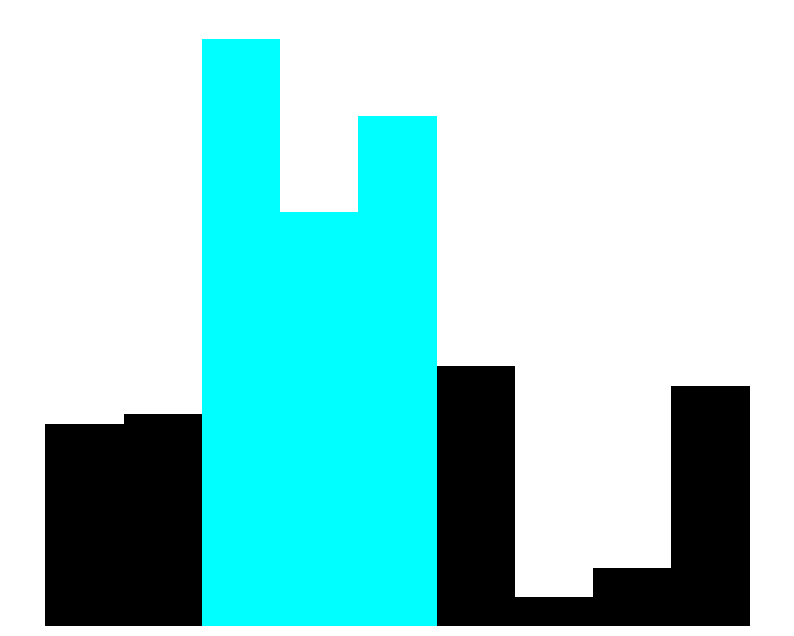

In [20]:
plt.figure(figsize=(10, 8))

#plt.title("DL")

plt.bar(X,ORI_rev,color="black", width=1)
plt.bar(X, dl_rev, color="aqua", width=1)
#plt.axis([0, 8, 130,　65 ])
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig(f"{out_dir}/xy_dl_bar.png")

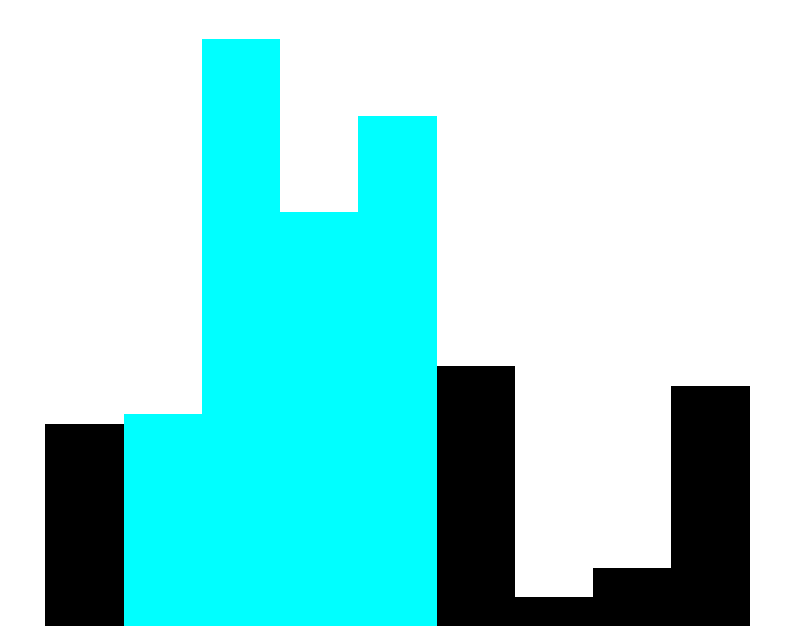

In [21]:
plt.figure(figsize=(10, 8))

#plt.title("DL")
plt.bar(X,ORI_rev,color="black", width=1)
plt.bar(X, nk_rev, color="aqua", width=1)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig(f"{out_dir}/xy_nk_bar.png")

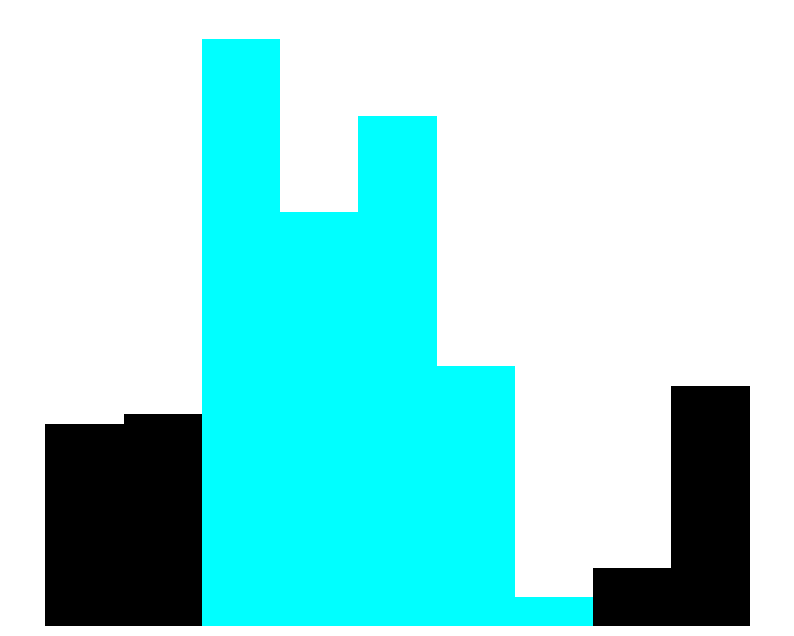

In [22]:
plt.figure(figsize=(10, 8))

#plt.title("DL")
plt.bar(X,ORI_rev,color="black", width=1)
plt.bar(X, ss_rev, color="aqua", width=1)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig(f"{out_dir}/xy_ss_bar.png")